In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score

# **Dataset Load and and Problem Identify**

In [ ]:
df = pd.read_csv('/content/E-commerce Shipping Dataset.csv')
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
df.shape

(10999, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
num_features = df.shape[1] - 1    #excluding target
num_features

11

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns
categorical_features, numerical_features

(Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object'),
 Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
        'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
        'Reached.on.Time_Y.N'],
       dtype='object'))

# **Correlation Analysis and Heatmap**

In [ ]:
numerical_df = df.select_dtypes(include=['int64','float64'])
numerical_df.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
corr_matrix = numerical_df.corr()
corr_matrix

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


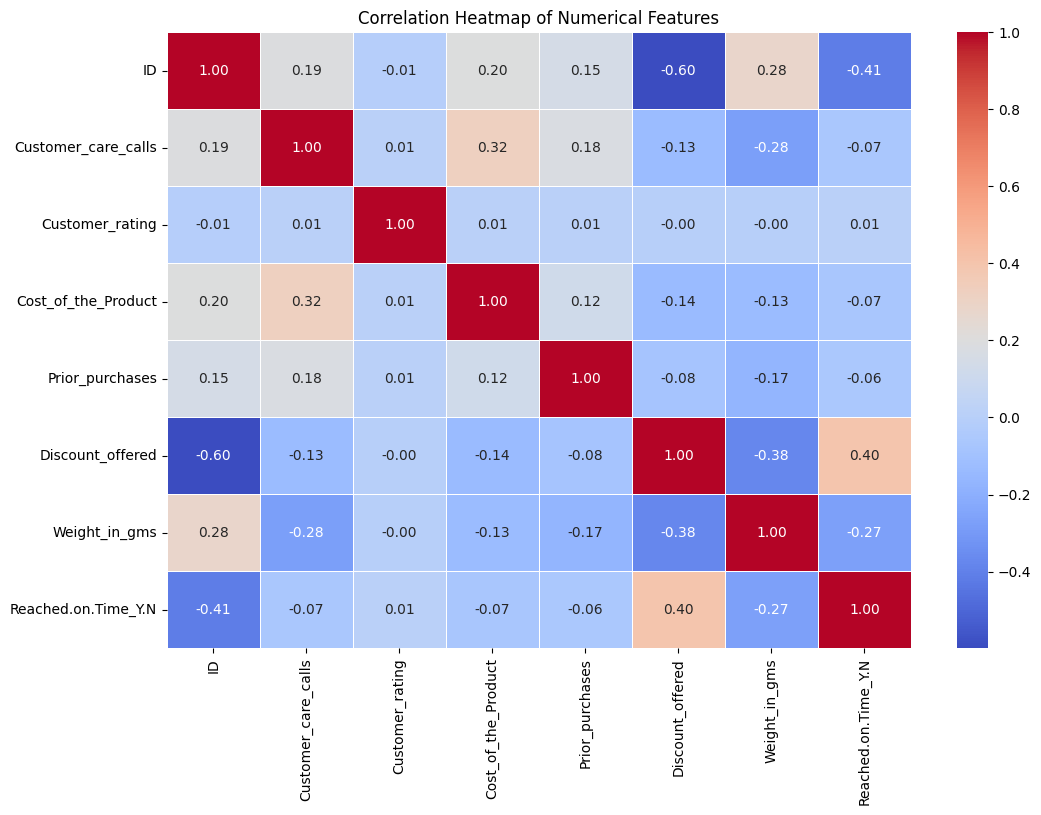

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Imbalanced Dataset**

In [ ]:
class_counts = df['Reached.on.Time_Y.N'].value_counts()
class_counts

,count
Reached.on.Time_Y.N,
1,6563
0,4436


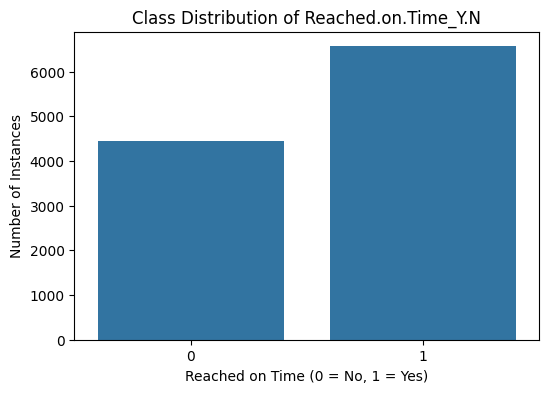

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Class Distribution of Reached.on.Time_Y.N")
plt.xlabel("Reached on Time (0 = No, 1 = Yes)")
plt.ylabel("Number of Instances")
plt.show()

# **Exploratory Data Analysis (EDA)**

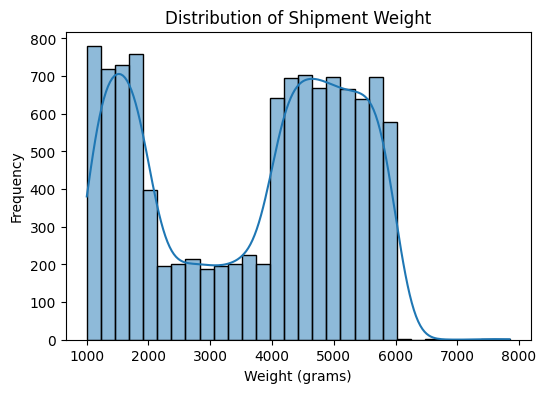

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Weight_in_gms'], bins=30, kde=True)
plt.title("Distribution of Shipment Weight")
plt.xlabel("Weight (grams)")
plt.ylabel("Frequency")
plt.show()

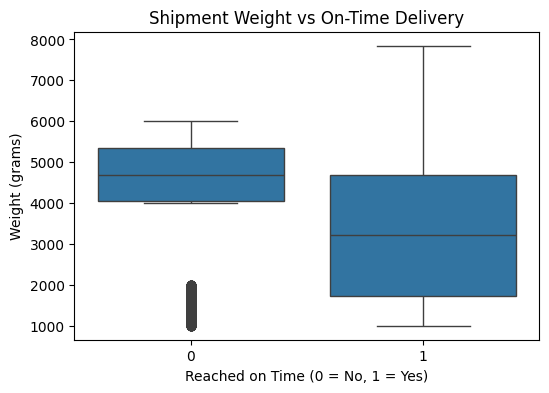

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Reached.on.Time_Y.N',
    y='Weight_in_gms',
    data=df)

plt.title("Shipment Weight vs On-Time Delivery")
plt.xlabel("Reached on Time (0 = No, 1 = Yes)")
plt.ylabel("Weight (grams)")
plt.show()

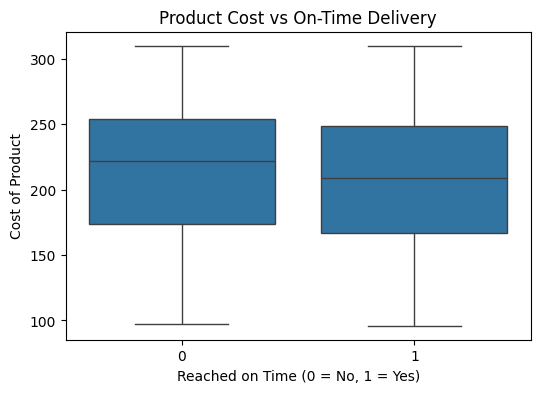

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Reached.on.Time_Y.N',
    y='Cost_of_the_Product',
    data=df)

plt.title("Product Cost vs On-Time Delivery")
plt.xlabel("Reached on Time (0 = No, 1 = Yes)")
plt.ylabel("Cost of Product")
plt.show()

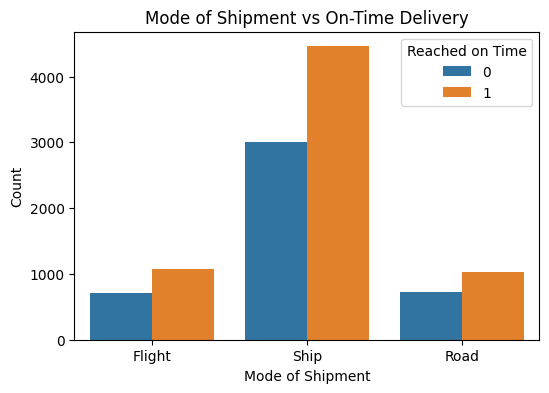

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='Mode_of_Shipment',
    hue='Reached.on.Time_Y.N',
    data=df)

plt.title("Mode of Shipment vs On-Time Delivery")
plt.xlabel("Mode of Shipment")
plt.ylabel("Count")
plt.legend(title="Reached on Time")
plt.show()

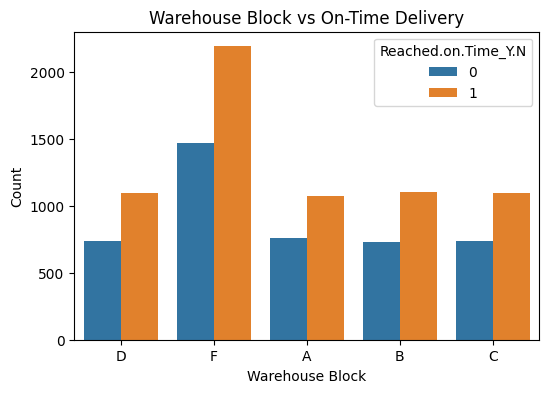

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='Warehouse_block',
    hue='Reached.on.Time_Y.N',
    data=df)

plt.title("Warehouse Block vs On-Time Delivery")
plt.xlabel("Warehouse Block")
plt.ylabel("Count")
plt.show()

# **Dataset Pre-processing**

**Null / Missing Values**

In [ ]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


**Categorical Values**

In [ ]:
categorical_features

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [ ]:
df_encoded = df.copy()

le = LabelEncoder()
for col in categorical_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cluster
0,1,3,0,4,2,177,3,1,0,44,1233,1,1
1,2,4,0,4,5,216,2,1,1,59,3088,1,1
2,3,0,0,2,2,183,4,1,1,48,3374,1,1
3,4,1,0,3,3,176,4,2,1,10,1177,1,1
4,5,2,0,2,2,184,3,2,0,46,2484,1,1
5,6,4,0,3,1,162,3,2,0,12,1417,1,1
6,7,3,0,3,4,250,3,1,0,3,2371,1,1
7,8,4,0,4,1,233,2,1,0,48,2804,1,1
8,9,0,0,3,4,150,3,1,0,11,1861,1,1
9,10,1,0,3,2,164,3,2,0,29,1187,1,1


**Feature Scaling**

In [ ]:
X = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_encoded['Reached.on.Time_Y.N']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Dataset Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7699, 11), (3300, 11), (7699,), (3300,))

In [ ]:
pd.Series(y_train).value_counts(normalize=True)
pd.Series(y_test).value_counts(normalize=True)

,proportion
Reached.on.Time_Y.N,
1,0.596667
0,0.403333


# **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = log_reg.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.6621212121212121

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1331
           1       0.74      0.68      0.71      1969

    accuracy                           0.66      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.66      0.66      3300



In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[ 851,  480],
       [ 635, 1334]])

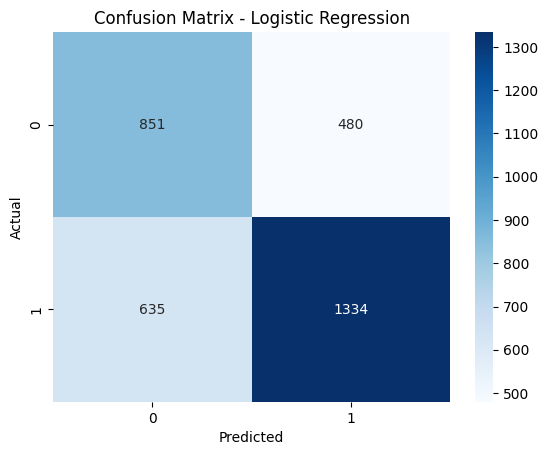

In [ ]:
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

lr_auc = roc_auc_score(y_test, y_prob_lr)
lr_auc

np.float64(0.7411306505531455)

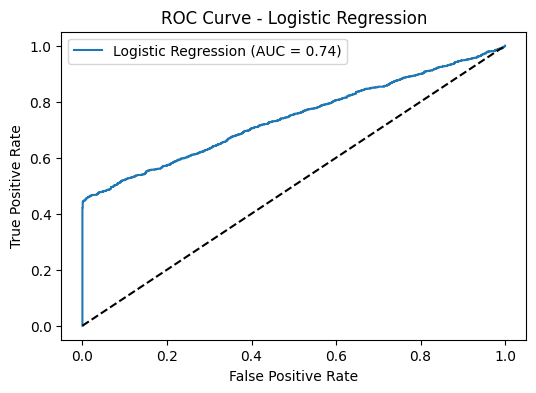

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# **K-Nearest Neighbors (KNN)**

In [ ]:
K = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_accuracy

0.6587878787878788

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59      1331
           1       0.73      0.68      0.71      1969

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300



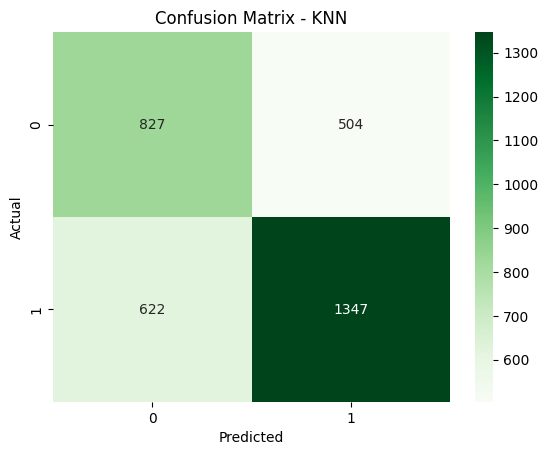

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_prob_knn = knn.predict_proba(X_test)[:, 1]

knn_auc = roc_auc_score(y_test, y_prob_knn)
knn_auc

np.float64(0.730623881279288)

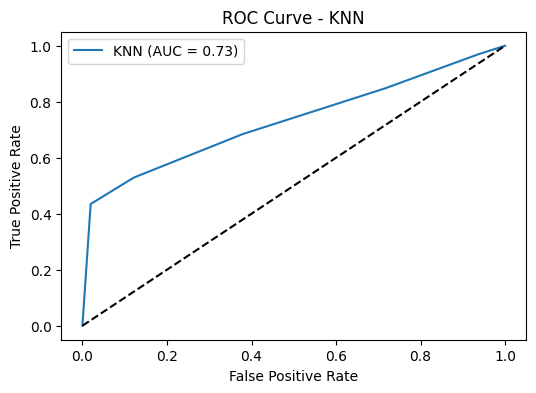

In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

# **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.6742424242424242

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.56      0.84      0.68      1331
           1       0.84      0.56      0.67      1969

    accuracy                           0.67      3300
   macro avg       0.70      0.70      0.67      3300
weighted avg       0.73      0.67      0.67      3300



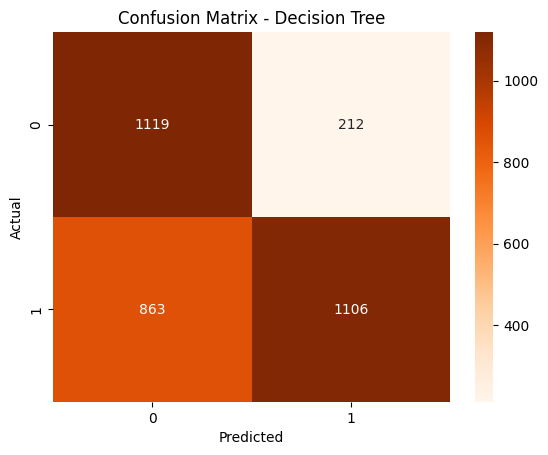

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_prob_dt = dt.predict_proba(X_test)[:, 1]

dt_auc = roc_auc_score(y_test, y_prob_dt)
dt_auc

np.float64(0.7324456956606513)

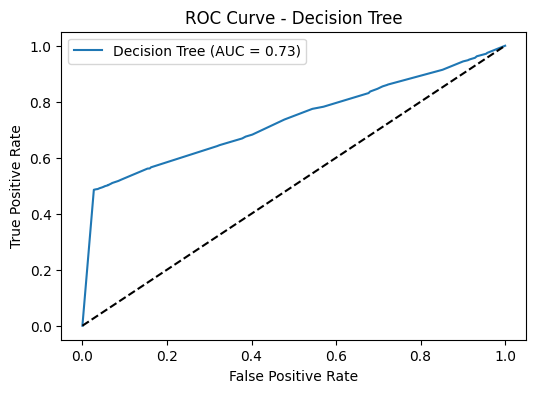

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# **Neural Network**

In [ ]:
nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42)

nn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [ ]:
y_pred_nn = nn.predict(X_test)

In [ ]:
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_accuracy

0.6548484848484849

In [ ]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.56      0.66      0.61      1331
           1       0.74      0.65      0.69      1969

    accuracy                           0.65      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.65      0.66      3300



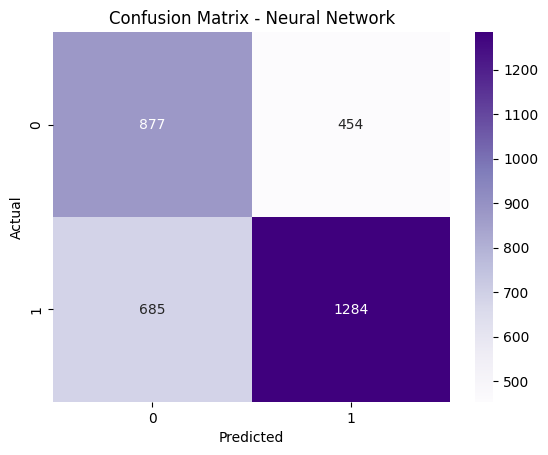

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_prob_nn = nn.predict_proba(X_test)[:, 1]

nn_auc = roc_auc_score(y_test, y_prob_nn)
nn_auc

np.float64(0.7369650316189441)

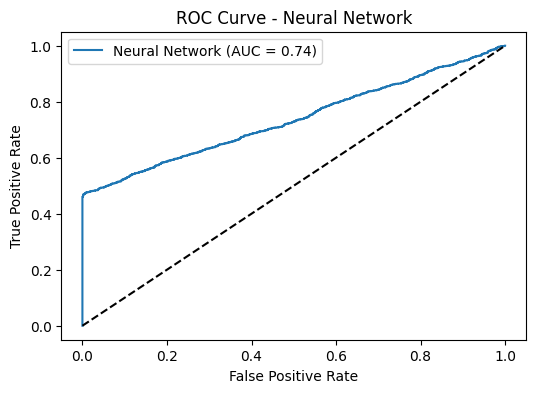

In [ ]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.show()

# **K-Means Clustering (Unsupervised Learning)**

In [ ]:
X_kmeans = X_scaled

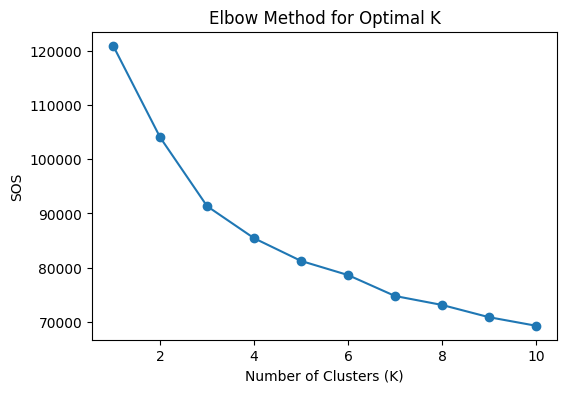

In [ ]:
sos = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_kmeans)
    sos.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sos, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SOS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_kmeans)

df['Cluster'] = clusters
df[['Cluster']].head()

,Cluster
0,1
1,1
2,1
3,1
4,1


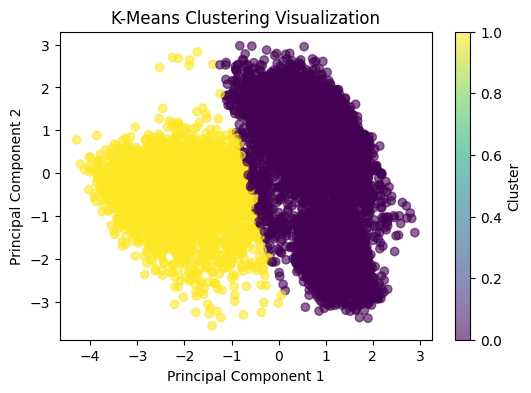

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization")
plt.colorbar(label="Cluster")
plt.show()

# **Model Comparison and Analysis**

In [ ]:
model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'KNN',
        'Decision Tree',
        'Neural Network'
    ],
    'Accuracy': [
        lr_accuracy,
        knn_accuracy,
        dt_accuracy,
        nn_accuracy
    ],
    'AUC': [
        lr_auc,
        knn_auc,
        dt_auc,
        nn_auc
    ]
})

model_comparison

,Model,Accuracy,AUC
0,Logistic Regression,0.662121,0.741131
1,KNN,0.658788,0.730624
2,Decision Tree,0.674242,0.732446
3,Neural Network,0.654848,0.736965


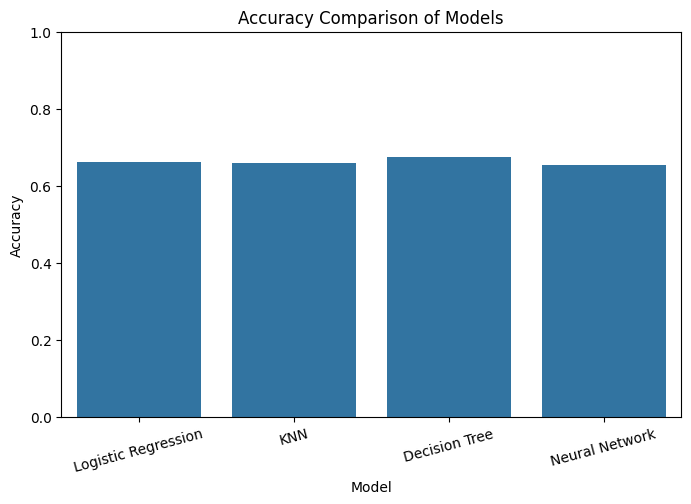

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

In [ ]:
precision_scores = [
    precision_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_nn)
]

recall_scores = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_nn)
]

pr_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Neural Network'],
    'Precision': precision_scores,
    'Recall': recall_scores
})

pr_comparison

,Model,Precision,Recall
0,Logistic Regression,0.735391,0.677501
1,KNN,0.727715,0.684104
2,Decision Tree,0.839150,0.561706
3,Neural Network,0.738780,0.652108


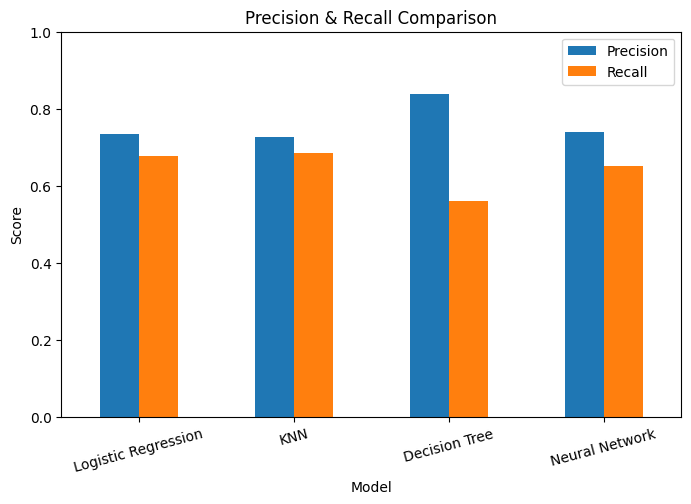

In [ ]:
pr_comparison.set_index('Model').plot(
    kind='bar',
    figsize=(8, 5)
)
plt.title("Precision & Recall Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

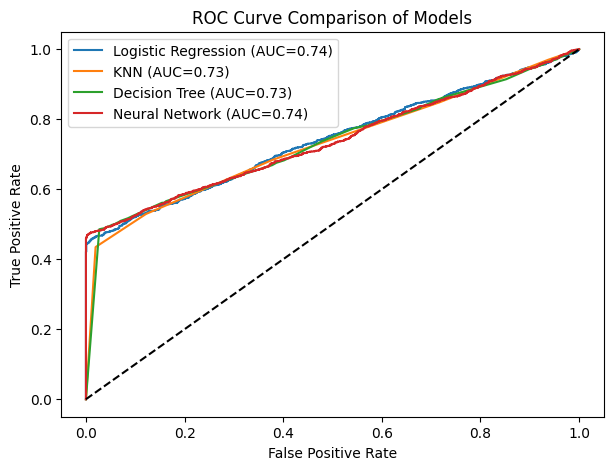

In [ ]:
plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={lr_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={knn_auc:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={dt_auc:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC={nn_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Models")
plt.legend()
plt.show()